In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Loading data into dataframe
#Pre processing data by replacing NaN and changing Postseason to integers instead of strings
cbb = pd.read_csv('/content/drive/My Drive/CBB/cbb.csv')
cbb = cbb.replace(np.NaN, 0)
round = [(0, 0), ('R68', 1), ('R64', 2), ('R32', 3), ('S16', 4), ('E8', 5), ('F4', 6), ('2ND', 7), ('Champions', 8)]
cbb['POSTSEASON'] = cbb['POSTSEASON'].map(dict(round))
cbb = cbb.set_index(['TEAM'])
cbb

,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
TEAM,,,,,,,,,,,,,,,,,,,,,,,
North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,7,1.0,2016
Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,7,1.0,2015
Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,7,3.0,2018
Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,7,3.0,2019
Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,7,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Texas A&M,SEC,35,22,111.2,94.7,0.8640,51.4,46.9,19.2,15.3,33.9,27.3,32.0,27.6,52.5,45.7,32.9,32.6,70.3,1.9,4,7.0,2018
LSU,SEC,35,28,117.9,96.6,0.9081,51.2,49.9,17.9,20.1,36.7,30.8,37.1,33.1,52.9,49.4,31.9,33.7,71.2,7.3,4,3.0,2019
Tennessee,SEC,36,31,122.8,95.2,0.9488,55.3,48.1,15.8,18.0,31.6,30.2,33.3,34.9,55.4,44.7,36.7,35.4,68.8,9.9,4,2.0,2019


In [3]:
#Finding correlation between factors and number of wins
cbb.corr()['W'].drop('W').sort_values()

ADJDE        -0.690753
EFG_D        -0.609144
2P_D         -0.529558
3P_D         -0.485485
TOR          -0.467073
DRB          -0.366715
FTRD         -0.329245
ADJ_T        -0.016057
YEAR          0.091829
FTR           0.126931
TORD          0.138805
ORB           0.296395
3P_O          0.432743
SEED          0.439614
2P_O          0.585806
EFG_O         0.617839
POSTSEASON    0.630164
G             0.708838
ADJOE         0.754532
BARTHAG       0.814512
WAB           0.905029
Name: W, dtype: float64

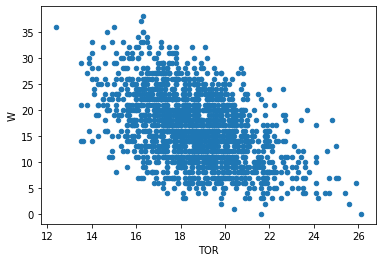

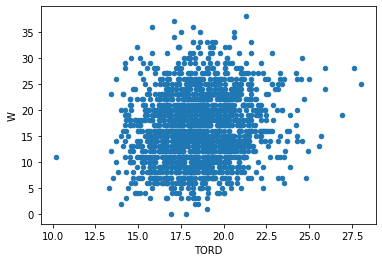

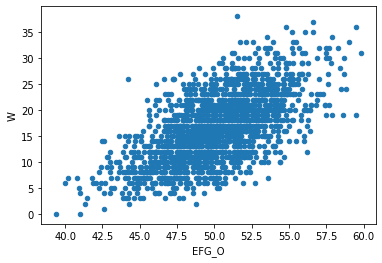

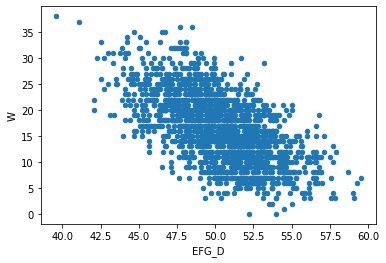

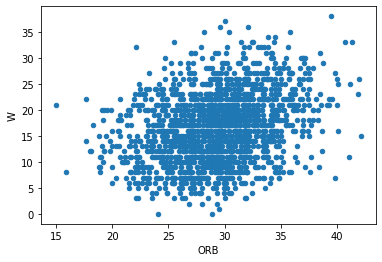

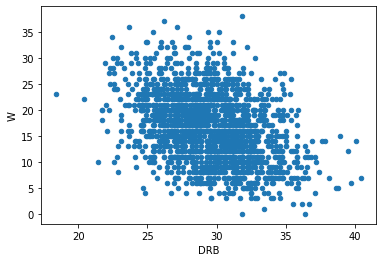

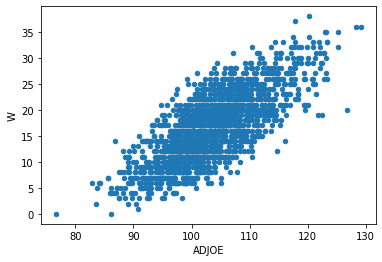

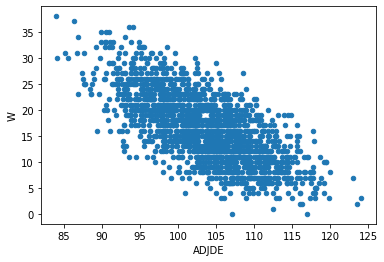

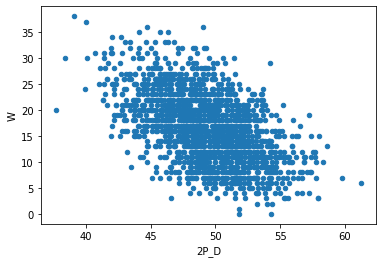

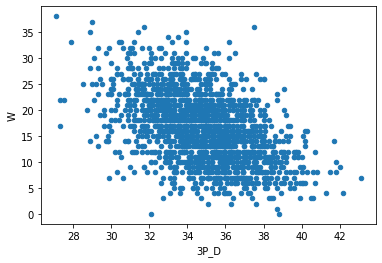

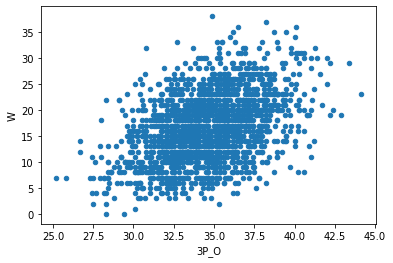

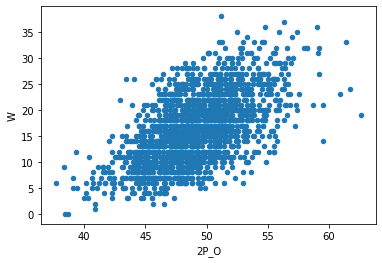

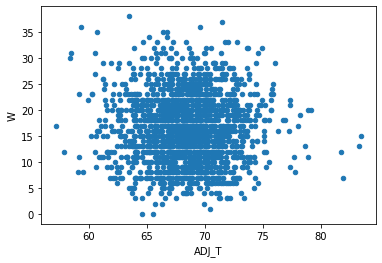

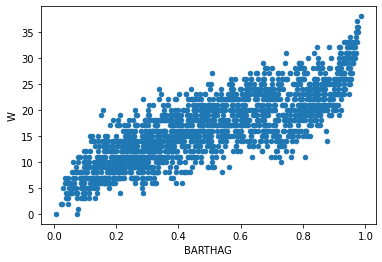

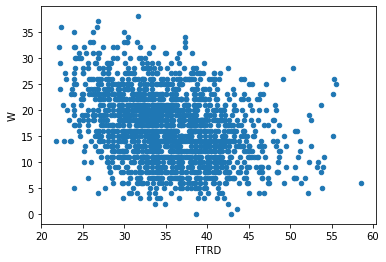

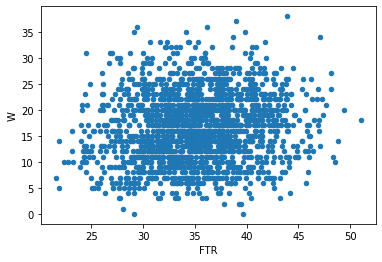

In [4]:
#creating scatter plots of correlation between factors and wins
cbb.plot.scatter(x='TOR', y='W')
cbb.plot.scatter(x='TORD', y='W')
cbb.plot.scatter(x='EFG_O', y='W')
cbb.plot.scatter(x='EFG_D', y='W')
cbb.plot.scatter(x='ORB', y='W')
cbb.plot.scatter(x='DRB', y='W')
cbb.plot.scatter(x='ADJOE', y='W')
cbb.plot.scatter(x='ADJDE', y='W')
cbb.plot.scatter(x='2P_D', y='W')
cbb.plot.scatter(x='3P_D', y='W')
cbb.plot.scatter(x='3P_O', y='W')
cbb.plot.scatter(x='2P_O', y='W')
cbb.plot.scatter(x='ADJ_T', y='W')
cbb.plot.scatter(x='BARTHAG', y='W')
cbb.plot.scatter(x='FTRD', y='W')
cbb.plot.scatter(x='FTR', y='W')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

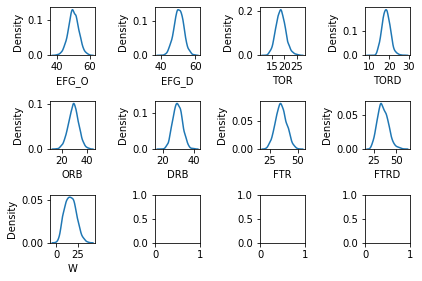

In [5]:
#check distribution of factors
import seaborn as sns
fig, axes = plt.subplots(ncols=4, nrows=3)
test = cbb[['EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB','FTR','FTRD', 'W']]
for col, ax in zip(test.columns, axes.flat):
  sns.distplot(test[col], hist = False, ax = ax)
plt.tight_layout()
plt.show()

In [6]:
#Using linear regression to find number of wins in a season
cols = ['EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB','FTR','FTRD']
x_trainLIN, x_testLIN, y_trainLIN, y_testLIN = train_test_split(cbb[cols], cbb['W'], test_size = .2)
model = LinearRegression(fit_intercept=True)
model.fit(x_trainLIN, y_trainLIN)
yfitLIN = model.predict(x_testLIN)
yfitLIN = np.vectorize(np.round)(yfitLIN)
df = pd.DataFrame({'Predicted' : yfitLIN, 'Actual' : y_testLIN})
df

,Predicted,Actual
TEAM,,
Loyola Marymount,16.0,15
Illinois Chicago,15.0,16
Northwestern St.,7.0,5
Denver,9.0,8
Weber St.,20.0,20
...,...,...
Wofford,14.0,13
Virginia Tech,29.0,26
UMBC,19.0,21


In [7]:
#check if predicted wins is within 3 of actual wins
def getWithin(x):
  if abs(x['Predicted'] - x['Actual']) <= 3:
    return 1
  return 0

In [8]:
#add within 3 column
df['Within+-3'] = df.apply(getWithin, axis = 1)
df

,Predicted,Actual,Within+-3
TEAM,,,
Loyola Marymount,16.0,15,1
Illinois Chicago,15.0,16,1
Northwestern St.,7.0,5,1
Denver,9.0,8,1
Weber St.,20.0,20,1
...,...,...,...
Wofford,14.0,13,1
Virginia Tech,29.0,26,1
UMBC,19.0,21,1


In [9]:
#accuracy of linear regression 
accuracyLIN = df['Within+-3'].sum() / len(df)
accuracyLIN

0.8721590909090909

In [10]:
#error of linear regression
errorLIN = (abs(df['Predicted'] - df['Actual'])).sum() / len(df['Predicted'])
errorLIN

1.8096590909090908

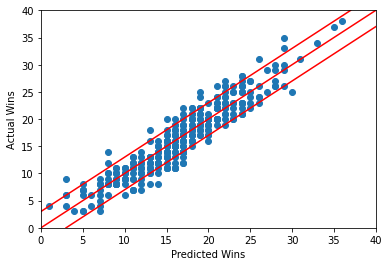

In [11]:
plt.scatter( df['Predicted'], df['Actual'])
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel("Predicted Wins")
plt.ylabel("Actual Wins")
x = np.linspace(0,40,100)
y = x
plt.plot(x , y, color = 'red')
plt.plot(x + 3, y, color = 'red')
plt.plot(x - 3, y, color = 'red')

Text(0, 0.5, 'Wins')

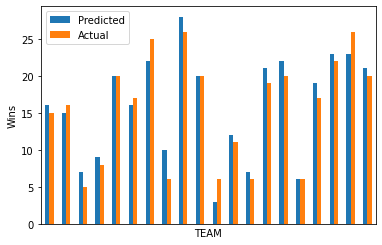

In [12]:
df[['Predicted', 'Actual']].iloc[:20].plot.bar()
plt.tick_params(axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.ylabel("Wins")

In [13]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
x_trainKN, x_testKN, y_trainKN, y_testKN = train_test_split(cbb[cols], cbb['W'], test_size = .2)


Minimum error:- 0.8721590909090909 at K = 36


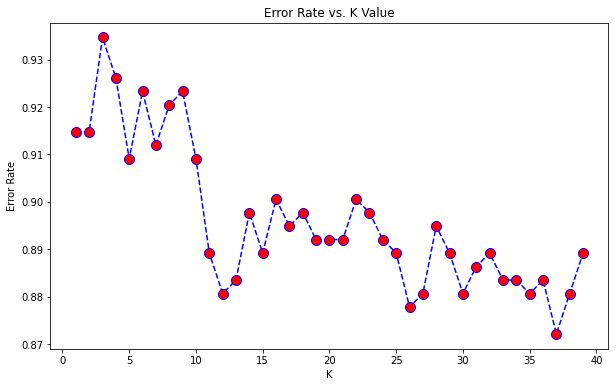

In [14]:
#find optimal number of neighbors
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_trainKN,y_trainKN)
 pred_i = knn.predict(x_testKN)
 error_rate.append(np.mean(pred_i != y_testKN))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [15]:
knn = KNeighborsRegressor(n_neighbors = 18)
knn.fit(x_trainKN, y_trainKN)
predictionKN = knn.predict(x_testKN)
predictionKN = np.vectorize(np.round)(predictionKN)
df2 = pd.DataFrame({'Predicted' : predictionKN, 'Actual' : y_testKN})
df2

,Predicted,Actual
TEAM,,
Northern Colorado,15.0,11
Georgia Southern,17.0,19
Florida,21.0,16
Richmond,20.0,16
Virginia,23.0,31
...,...,...
San Diego St.,17.0,21
Wichita St.,17.0,22
Wake Forest,18.0,19


In [16]:
#add within column to df2
df2['Within+-3'] = df2.apply(getWithin, axis = 1)
df2

,Predicted,Actual,Within+-3
TEAM,,,
Northern Colorado,15.0,11,0
Georgia Southern,17.0,19,1
Florida,21.0,16,0
Richmond,20.0,16,0
Virginia,23.0,31,0
...,...,...,...
San Diego St.,17.0,21,0
Wichita St.,17.0,22,0
Wake Forest,18.0,19,1


In [17]:
#accuracy of KNN
accuracyKN = df2['Within+-3'].sum() / len(df)
accuracyKN

0.7528409090909091

In [18]:
#error of KNN
errorKN = (abs(df['Predicted'] - df['Actual'])).sum() / len(df['Predicted'])
errorKN

1.8096590909090908

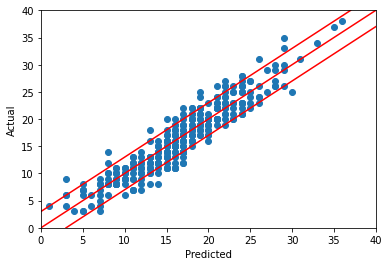

In [19]:
#scatter plot for knn
plt.scatter( df['Predicted'], df['Actual'])
plt.xlim(0,40)
plt.ylim(0,40)
plt.xlabel("Predicted")
plt.ylabel("Actual")
x = np.linspace(0,40,100)
y = x
plt.plot(x , y, color = 'red')
plt.plot(x + 3, y, color = 'red')
plt.plot(x - 3, y, color = 'red')

Text(0, 0.5, 'Wins')

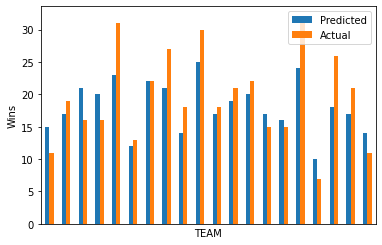

In [20]:
df2[['Predicted', 'Actual']].iloc[:20].plot.bar()
plt.tick_params(axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.ylabel("Wins")

In [21]:
#vectorize postseason
def vectorize(data, dimensions = 9):
    results = np.zeros((len(data),dimensions))
    for i, s in enumerate(data) :
        results[i,s]=1
    return results


In [22]:
#vectorize postseason
postseason = cbb['POSTSEASON'].values.astype(int)
vectorized = vectorize(postseason)
vectorized

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
#make training and testing with test_size .2
cols = ['EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB','FTR','FTRD']
x_trainNN, x_testNN, y_trainNN, y_testNN = train_test_split(cbb[cols], vectorized, test_size = .2)

In [24]:
#make model for neural network
model = models.Sequential()
model.add(layers.Dense(18, activation='relu', input_shape=(8, )))
model.add(layers.Dense(18, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_trainNN, y_trainNN, epochs=5, batch_size=10)

Epoch 1/5
141/141 [==============================] - 0s 1ms/step - loss: 1.6855 - accuracy: 0.7972
Epoch 2/5
141/141 [==============================] - 0s 1ms/step - loss: 0.7919 - accuracy: 0.8164
Epoch 3/5
141/141 [==============================] - 0s 1ms/step - loss: 0.7157 - accuracy: 0.8185
Epoch 4/5
141/141 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.8171
Epoch 5/5
141/141 [==============================] - 0s 1ms/step - loss: 0.6400 - accuracy: 0.8142


In [25]:
#get accuracy of neural network 
results = model.evaluate(x_testNN, y_testNN)

11/11 [==============================] - 0s 1ms/step - loss: 0.8345 - accuracy: 0.7699


In [26]:
predictionNN = model.predict(x_testNN)
predictionNN

array([[9.57818270e-01, 1.38294150e-03, 2.94548888e-02, ...,
        2.19228584e-03, 2.84681120e-03, 1.95844492e-04],
       [8.88474464e-01, 2.56758905e-03, 4.21173759e-02, ...,
        5.21836663e-03, 2.00088415e-02, 4.42253222e-04],
       [9.13498759e-01, 5.66716818e-03, 4.25807275e-02, ...,
        5.59000904e-03, 1.87852129e-03, 1.18857436e-03],
       ...,
       [9.71311927e-01, 5.05303382e-04, 2.45542191e-02, ...,
        9.89057124e-04, 1.00753205e-04, 3.26069385e-05],
       [9.41802740e-01, 2.42187106e-03, 2.27854438e-02, ...,
        6.06333977e-03, 9.29524947e-04, 5.23292809e-04],
       [9.79882538e-01, 6.76785246e-04, 7.78346509e-03, ...,
        2.03280873e-03, 6.35697274e-03, 1.51186148e-04]], dtype=float32)

In [27]:
x_testNN

,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD
TEAM,,,,,,,,
Ball St.,48.9,52.4,21.6,18.2,29.9,28.6,35.4,42.1
Georgia Tech,44.4,49.2,19.6,18.0,38.7,25.8,31.1,33.8
Southeast Missouri St.,48.9,50.2,19.2,19.3,32.2,31.6,36.4,41.8
Oakland,54.3,53.0,18.4,17.2,25.7,32.5,35.7,28.0
Maryland Eastern Shore,51.7,51.1,23.4,21.3,35.5,31.9,47.0,41.1
...,...,...,...,...,...,...,...,...
Tulsa,47.1,45.5,17.7,19.7,30.8,28.5,41.4,30.9
Richmond,54.1,53.1,15.3,18.5,19.1,29.9,30.7,28.7
Portland,47.3,51.8,19.9,16.3,20.3,30.1,39.0,34.6


In [28]:
#prediction of cal poly basketball
predictionCP = model.predict(cbb.loc['Cal Poly'][cols])
predictionCP

array([[8.8793993e-01, 3.9252406e-03, 3.4405701e-02, 3.8445618e-02,
        1.3952912e-02, 1.2645761e-02, 5.3217742e-03, 2.7374702e-03,
        6.2559155e-04],
       [9.1686815e-01, 4.1010333e-03, 3.1074954e-02, 2.4615696e-02,
        1.1708584e-02, 4.0116590e-03, 3.1080702e-03, 3.8407794e-03,
        6.7108101e-04],
       [9.6211916e-01, 2.7507164e-03, 1.3021165e-02, 5.9526186e-03,
        7.6857964e-03, 2.1303357e-03, 3.5104912e-03, 2.0473429e-03,
        7.8238122e-04],
       [9.7810662e-01, 9.5822691e-04, 9.2373639e-03, 3.2211372e-03,
        3.1037345e-03, 1.6721808e-03, 2.1606036e-03, 1.3899860e-03,
        1.5018422e-04],
       [9.6539170e-01, 2.2459445e-03, 8.3121108e-03, 6.5117595e-03,
        8.1570167e-03, 2.5517615e-03, 3.6784967e-03, 2.5207978e-03,
        6.3044199e-04]], dtype=float32)

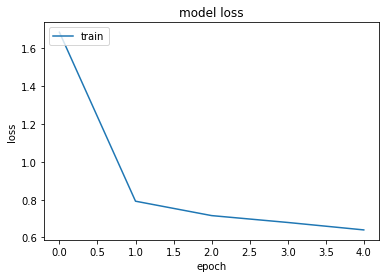

In [29]:
#find optimal number of epochs
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [30]:
#dataframe of cal poly with % of making each round
df3 = pd.DataFrame(predictionCP, index=['2015', '2016', '2017', '2018', '2019'], columns=['No Playoffs', 'R68', 'R64', 'R32', 'S16', 'E8','F4','2ND', 'Champion'])
df3

,No Playoffs,R68,R64,R32,S16,E8,F4,2ND,Champion
2015,0.887940,0.003925,0.034406,0.038446,0.013953,0.012646,0.005322,0.002737,0.000626
2016,0.916868,0.004101,0.031075,0.024616,0.011709,0.004012,0.003108,0.003841,0.000671
2017,0.962119,0.002751,0.013021,0.005953,0.007686,0.002130,0.003510,0.002047,0.000782
2018,0.978107,0.000958,0.009237,0.003221,0.003104,0.001672,0.002161,0.001390,0.000150
2019,0.965392,0.002246,0.008312,0.006512,0.008157,0.002552,0.003678,0.002521,0.000630


([<matplotlib.axis.YTick at 0x7fb301492160>,
 <a list of 10 Text major ticklabel objects>)

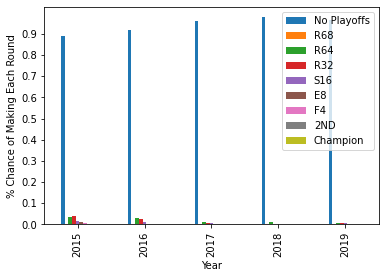

In [31]:
#make bar plot of cal poly basketball
df3.plot.bar()
plt.xlabel('Year')
plt.ylabel('% Chance of Making Each Round')
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [32]:
#trying k neighbors on postseason
x_train, x_test, y_train, y_test = train_test_split(cbb[cols], cbb['POSTSEASON'], test_size = .2)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
prediction

array([0.        , 0.        , 0.66666667, 0.        , 0.        ,
       0.        , 1.33333333, 0.        , 1.33333333, 0.        ,
       2.33333333, 0.66666667, 2.33333333, 0.66666667, 0.66666667,
       0.66666667, 0.        , 0.        , 0.        , 3.33333333,
       0.        , 0.        , 3.33333333, 0.        , 2.        ,
       0.66666667, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.66666667,
       0.        , 2.66666667, 1.        , 0.        , 0.        ,
       0.        , 0.        , 2.        , 0.        , 0.        ,
       0.        , 0.        , 0.66666667, 0.        , 0.        ,
       0.        , 0.66666667, 0.33333333, 0.        , 2.33333333,
       0.        , 1.33333333, 0.        , 0.        , 2.33333333,
       0.        , 4.33333333, 0.66666667, 0.        , 0.        ,
       0.66666667, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.66666667, 0.66666667, 0.     

In [33]:
df4 = pd.DataFrame(np.vectorize(np.round)(prediction), columns=['Predicted Round'], index = x_test.index.values)
df4

,Predicted Round
Washington,0.0
Loyola MD,0.0
Utah Valley,1.0
Loyola Marymount,0.0
Maryland Eastern Shore,0.0
...,...
North Dakota,0.0
Delaware St.,0.0
New Mexico St.,3.0
Sam Houston St.,0.0


In [34]:
df4['Actual Round'] = y_test.values
df4

,Predicted Round,Actual Round
Washington,0.0,3
Loyola MD,0.0,0
Utah Valley,1.0,0
Loyola Marymount,0.0,0
Maryland Eastern Shore,0.0,0
...,...,...
North Dakota,0.0,0
Delaware St.,0.0,0
New Mexico St.,3.0,0
Sam Houston St.,0.0,0


In [35]:
def getEqual(x):
  if x['Predicted Round'] == x['Actual Round']:
    return 1
  return 0

In [36]:
df4['Predicted Correct'] = df4.apply(getEqual, axis=1)
df4

,Predicted Round,Actual Round,Predicted Correct
Washington,0.0,3,0
Loyola MD,0.0,0,1
Utah Valley,1.0,0,0
Loyola Marymount,0.0,0,1
Maryland Eastern Shore,0.0,0,1
...,...,...,...
North Dakota,0.0,0,1
Delaware St.,0.0,0,1
New Mexico St.,3.0,0,0
Sam Houston St.,0.0,0,1


In [37]:
#accuracy of knn on postseason
accuracy2 = df4['Predicted Correct'].sum() / len(df4)
accuracy2

0.6704545454545454

In [38]:
#error of KNN postseason
errorKN = (abs(df4['Predicted Round'] - df4['Actual Round'])).sum() / len(df4['Predicted Round'])
errorKN

0.5539772727272727